In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from termcolor import colored

pd.options.display.max_columns = None
print(f'pandas version = {pd.__version__}')
print(pd.Timestamp.now())



%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pandas version = 2.0.0
2023-04-15 11:51:38.934997


In [153]:
df = pd.read_csv('https://raw.githubusercontent.com/Sitanans/busint/main/condo.csv')

In [154]:
df.columns = ['name','post-by','constructed-yr','new','price','space','room','range-from-bts']
pd.set_option('max_colwidth', None)
df

,name,post-by,constructed-yr,new,price,space,room,range-from-bts
0,"Happy Condo Ratchada 18, กรุงเทพ- ​ซอยรัชดา 18 ถนนประชาราษฎร์บำเพ็ญ แขวงสามเสนนอก เขตห้วยขวาง กรุงเทพมหานคร, สามเสนนอก, ห้วยขวาง, กรุงเทพ",ลงประกาศโดย คนึง นพพรพิทักษ์,<span>ปีที่สร้างเสร็จ: 2015</span>,NaN,"1,450,000",29 ตร.ม.,"<li class=""listing-rooms pull-left""><span class=""bed"" title=""1 ห้องนอน"">1 <i class=""pg-icon pgicon-bedroom""></i></span> <span class=""bath"" title=""1 ห้องน้ำ"">1 <i class=""pg-icon pgicon-bathroom""></i></span></li>",[]
1,"Aspire Rama 9 : แอสปาย พระราม 9, กรุงเทพซอยพระราม 9 แยก 2 ถนนพระราม 9 แขวงห้วยขวาง เขตห้วยขวาง กรุงเทพมหานคร, ห้วยขวาง, ห้วยขวาง, กรุงเทพ",ลงประกาศโดย Jeerapon Pakutsa,<span>ปีที่สร้างเสร็จ: 2013</span>,NaN,"5,550,000",66 ตร.ม.,"<li class=""listing-rooms pull-left""><span class=""bed"" title=""2 ห้องนอน"">2 <i class=""pg-icon pgicon-bedroom""></i></span> <span class=""bath"" title=""2 ห้องน้ำ"">2 <i class=""pg-icon pgicon-bathroom""></i></span></li>","[[<li itemscope="""" itemtype=""https://schema.org/Photograph"" style=""left: 0%;""><img alt=""ขาย - Aspire Rama 9 : แอสปาย พระราม 9, กรุงเทพ"" itemprop=""thumbnailUrl"" onerror=""this.src='https://cdn2.pgimgs.com/1680685035/sf2-search/bundles/guruweblayout/img/desktop/missing/nophoto_property_400x300.png';"" src=""https://th2-cdn.pgimgs.com/listing/10643327/UPHO.113463965.V800/Aspire-Rama-9-%E0%B9%81%E0%B8%AD%E0%B8%AA%E0%B8%9B%E0%B8%B2%E0%B8%A2-%E0%B8%9E%E0%B8%A3%E0%B8%B0%E0%B8%A3%E0%B8%B2%E0%B8%A1-9-%E0%B8%AB%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B8%82%E0%B8%A7%E0%B8%B2%E0%B8%87-Thailand.jpg""/></li>, <li class=""list-price pull-left""><span class=""currency"">฿</span><span class=""price"">5,550,000</span><span class=""period""></span> </li>, <li class=""listing-rooms pull-left""><span class=""bed"" title=""2 ห้องนอน"">2 <i class=""pg-icon pgicon-bedroom""></i></span> <span class=""bath"" title=""2 ห้องน้ำ"">2 <i class=""pg-icon pgicon-bathroom""></i></span></li>, <li>\n<i class=""pgicon pgicon-walk""></i> 5 นาที (390 ม.) ถึง BL20 MRT พระราม 9\n </li>, <li class=""""><span>คอนโด</span></li>]]"
2,"Belle Grand Rama 9 : เบลล์ แกรนด์ พระราม 9, กรุงเทพ131 ถนนพระราม 9, ห้วยขวาง, ห้วยขวาง, กรุงเทพ",ลงประกาศโดย Jeerapon Pakutsa,<span>ปีที่สร้างเสร็จ: 2015</span>,NaN,"9,700,000",95 ตร.ม.,"<li class=""listing-rooms pull-left""><span class=""bed"" title=""2 ห้องนอน"">2 <i class=""pg-icon pgicon-bedroom""></i></span> <span class=""bath"" title=""2 ห้องน้ำ"">2 <i class=""pg-icon pgicon-bathroom""></i></span></li>","[[<li itemscope="""" itemtype=""https://schema.org/Photograph"" style=""left: 0%;""><img alt=""ขาย - Belle Grand Rama 9 : เบลล์ แกรนด์ พระราม 9, กรุงเทพ"" itemprop=""thumbnailUrl"" onerror=""this.src='https://cdn2.pgimgs.com/1680685035/sf2-search/bundles/guruweblayout/img/desktop/missing/nophoto_property_400x300.png';"" src=""https://th2-cdn.pgimgs.com/listing/10643853/UPHO.113470539.V800/Belle-Grand-Rama-9-%E0%B9%80%E0%B8%9A%E0%B8%A5%E0%B8%A5%E0%B9%8C-%E0%B9%81%E0%B8%81%E0%B8%A3%E0%B8%99%E0%B8%94%E0%B9%8C-%E0%B8%9E%E0%B8%A3%E0%B8%B0%E0%B8%A3%E0%B8%B2%E0%B8%A1-9-%E0%B8%AB%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B8%82%E0%B8%A7%E0%B8%B2%E0%B8%87-Thailand.jpg""/></li>, <li class=""list-price pull-left""><span class=""currency"">฿</span><span class=""price"">9,700,000</span><span class=""period""></span> </li>, <li class=""listing-rooms pull-left""><span class=""bed"" title=""2 ห้องนอน"">2 <i class=""pg-icon pgicon-bedroom""></i></span> <span class=""bath"" title=""2 ห้องน้ำ"">2 <i class=""pg-icon pgicon-bathroom""></i></span></li>, <li>\n<i class=""pgicon pgicon-walk""></i> 7 นาที (540 ม.) ถึง BL20 MRT พระราม 9\n </li>, <li class=""""><span>คอนโด</span></li>]]"
3,"Royal Nine Residence Condominium ถนนพระราม 9 แขวงบางกะปิ เขตห้วยขวาง กรุงเทพมหานคร 10310, กรุงเทพพระราม 9, บางกะปิ, ห้วยขวาง, กรุงเทพ",ลงประกาศโดย วีรเมศวร์ ไพศาลพงษ์,NaN,NaN,"4,690,000",110 ตร.ม.,"<li class=""listing-rooms pull-left""><span class=""bed"" title=""3 ห้องนอน"">3 <i class=""pg-icon pgicon-bedroom""></i></spa

In [155]:
# Extract Number
df['post-by'] = df['post-by'].str.replace("ลงประกาศโดย","").str.strip()
df['constructed-yr'] = df['constructed-yr'].str.extract(r"(\d+)")
df['new'] = df['new'].str.extract(r"(\d+)")
df['price'] = pd.to_numeric(df['price'].str.replace(",",""))
df['space'] = df['space'].str.extract(r'(\d+)')
df['space'] = pd.to_numeric(df['space'])


# Replace same objective column 
# Column constructed-yr and new have similar value, column new have data only 2023 yr
df['constructed-yr'] = df['constructed-yr'].fillna(df['new'])

# Categorize room column
    # Extract wanted part
df['room'] = df['room'].str.findall(r'title="(.+?)">')
    # Categorize function
def split_data(row):
    if isinstance(row, list):
        if len(row) == 2:
            return row[0].split()[0], row[1].split()[0], None
        else:
            if 'สตูดิโอ' in row[0]:
                return None, None, row[0].split()[0]
            else:
                return row[0].split()[0], None, None
    else:
        return None, None, None

    # Apply function
df[['bedroom', 'bathroom', 'studio']] = df['room'].apply(lambda x: pd.Series(split_data(x)))

df['range-from-bts'] = df['range-from-bts'].replace('[]',np.nan)
df['range-from-bts'] = df['range-from-bts'].str.extract(r'(\d+ นาที \(\d+ ม\.\) ถึง .+)')

df[[0,1,2,3,4,5]] = df.name.str.split(',',expand=True)
not_null_rows = df[[5]].notnull().any(axis=1)
df.dropna(subset=[0,1,2,3,4],inplace=True)
df.drop(index=(df[not_null_rows]).index,inplace=True)
df.drop([5],axis=1,inplace=True)

df

/var/folders/s_/dwsv44nx7y34vj9w_6_jhcyh0000gn/T/ipykernel_93166/2847213674.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(index=(df[not_null_rows]).index,inplace=True)


,name,post-by,constructed-yr,new,price,space,room,range-from-bts,bedroom,bathroom,studio,0,1,2,3,4
0,"Happy Condo Ratchada 18, กรุงเทพ- ​ซอยรัชดา 18 ถนนประชาราษฎร์บำเพ็ญ แขวงสามเสนนอก เขตห้วยขวาง กรุงเทพมหานคร, สามเสนนอก, ห้วยขวาง, กรุงเทพ",คนึง นพพรพิทักษ์,2015,NaN,1450000.0,29,"[1 ห้องนอน, 1 ห้องน้ำ]",NaN,1,1,None,Happy Condo Ratchada 18,กรุงเทพ- ​ซอยรัชดา 18 ถนนประชาราษฎร์บำเพ็ญ แขวงสามเสนนอก เขตห้วยขวาง กรุงเทพมหานคร,สามเสนนอก,ห้วยขวาง,กรุงเทพ
1,"Aspire Rama 9 : แอสปาย พระราม 9, กรุงเทพซอยพระราม 9 แยก 2 ถนนพระราม 9 แขวงห้วยขวาง เขตห้วยขวาง กรุงเทพมหานคร, ห้วยขวาง, ห้วยขวาง, กรุงเทพ",Jeerapon Pakutsa,2013,NaN,5550000.0,66,"[2 ห้องนอน, 2 ห้องน้ำ]",5 นาที (390 ม.) ถึง BL20 MRT พระราม 9,2,2,None,Aspire Rama 9 : แอสปาย พระราม 9,กรุงเทพซอยพระราม 9 แยก 2 ถนนพระราม 9 แขวงห้วยขวาง เขตห้วยขวาง กรุงเทพมหานคร,ห้วยขวาง,ห้วยขวาง,กรุงเทพ
2,"Belle Grand Rama 9 : เบลล์ แกรนด์ พระราม 9, กรุงเทพ131 ถนนพระราม 9, ห้วยขวาง, ห้วยขวาง, กรุงเทพ",Jeerapon Pakutsa,2015,NaN,9700000.0,95,"[2 ห้องนอน, 2 ห้องน้ำ]",7 นาที (540 ม.) ถึง BL20 MRT พระราม 9,2,2,None,Belle Grand Rama 9 : เบลล์ แกรนด์ พระราม 9,กรุงเทพ131 ถนนพระราม 9,ห้วยขวาง,ห้วยขวาง,กรุงเทพ
3,"Royal Nine Residence Condominium ถนนพระราม 9 แขวงบางกะปิ เขตห้วยขวาง กรุงเทพมหานคร 10310, กรุงเทพพระราม 9, บางกะปิ, ห้วยขวาง, กรุงเทพ",วีรเมศวร์ ไพศาลพงษ์,NaN,NaN,4690000.0,110,"[3 ห้องนอน, 2 ห้องน้ำ]",NaN,3,2,None,Royal Nine Residence Condominium ถนนพระราม 9 แขวงบางกะปิ เขตห้วยขวาง กรุงเทพมหานคร 10310,กรุงเทพพระราม 9,บางกะปิ,ห้วยขวาง,กรุงเทพ
4,"ศุภาลัย ปาร์ค เอกมัย-ทองหล่อ, กรุงเทพเพชรบุรีตัดใหม่, บางกะปิ, ห้วยขวาง, กรุงเทพ",Duangporn Leelalumlert (Tracy),NaN,NaN,6200000.0,71,"[2 ห้องนอน, 1 ห้องน้ำ]",NaN,2,1,None,ศุภาลัย ปาร์ค เอกมัย-ทองหล่อ,กรุงเทพเพชรบุรีตัดใหม่,บางกะปิ,ห้วยขวาง,กรุงเทพ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,"Condolette Midst Rama 9, กรุงเทพ72 ถนนพระราม 9 แขวงห้วยขวาง เขตห้วยขวาง กรุงเทพมหานคร, ห้วยขวาง, ห้วยขวาง, กรุงเทพ","Bangkok Agency Management Co.,Ltd.",2015,NaN,4799999.0,35,"[1 ห้องนอน, 1 ห้องน้ำ]",4 นาที (270 ม.) ถึง BL20 MRT พระราม 9,1,1,None,Condolette Midst Rama 9,กรุงเทพ72 ถนนพระราม 9 แขวงห้วยขวาง เขตห้วยขวาง กรุงเทพมหานคร,ห้วยขวาง,ห้วยขวาง,กรุงเทพ
2997,"Asher รัชดา, กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม., สามเสนนอก, ห้วยขวาง, กรุงเทพ","Area66 Real Estate Co., Ltd",2019,NaN,1860000.0,27,"[1 ห้องนอน, 1 ห้องน้ำ]",NaN,1,1,None,Asher รัชดา,กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม.,สามเสนนอก,ห้วยขวาง,กรุงเทพ
2998,"Asher รัชดา, กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม., สามเสนนอก, ห้วยขวาง, กรุงเทพ","Area66 Real Estate Co., Ltd",2019,NaN,2000000.0,27,"[1 ห้องนอน, 1 ห้องน้ำ]",NaN,1,1,None,Asher รัชดา,กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม.,สามเสนนอก,ห้วยขวาง,กรุงเทพ
2999,"Asher รัชดา, กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม., สามเสนนอก, ห้วยขวาง, กรุงเทพ","Area66 Real Estate Co., Ltd",2019,NaN,2100000.0,27,"[1 ห้องนอน, 1 ห้องน้ำ]",NaN,1,1,None,Asher รัชดา,กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม.,สามเสนนอก,ห้วยขวาง,กรุงเทพ


In [156]:
df.columns

Index([          'name',        'post-by', 'constructed-yr',            'new',
                'price',          'space',           'room', 'range-from-bts',
              'bedroom',       'bathroom',         'studio',                0,
                      1,                2,                3,                4],
      dtype='object')

In [157]:
data = df.reset_index()
data.drop({"index"}, axis=1, inplace=True)
df = data[[0,1,2,3,4,'price','space','bedroom','bathroom','studio','constructed-yr','range-from-bts','post-by']]
df2 = df.rename(columns={0:"name",1:"address",2:"kwaeng",3:"district",4:"province"})
df2[['bedroom', 'bathroom']] = df2[['bedroom', 'bathroom']].fillna(1)
df2


,name,address,kwaeng,district,province,price,space,bedroom,bathroom,studio,constructed-yr,range-from-bts,post-by
0,Happy Condo Ratchada 18,กรุงเทพ- ​ซอยรัชดา 18 ถนนประชาราษฎร์บำเพ็ญ แขวงสามเสนนอก เขตห้วยขวาง กรุงเทพมหานคร,สามเสนนอก,ห้วยขวาง,กรุงเทพ,1450000.0,29,1,1,None,2015,NaN,คนึง นพพรพิทักษ์
1,Aspire Rama 9 : แอสปาย พระราม 9,กรุงเทพซอยพระราม 9 แยก 2 ถนนพระราม 9 แขวงห้วยขวาง เขตห้วยขวาง กรุงเทพมหานคร,ห้วยขวาง,ห้วยขวาง,กรุงเทพ,5550000.0,66,2,2,None,2013,5 นาที (390 ม.) ถึง BL20 MRT พระราม 9,Jeerapon Pakutsa
2,Belle Grand Rama 9 : เบลล์ แกรนด์ พระราม 9,กรุงเทพ131 ถนนพระราม 9,ห้วยขวาง,ห้วยขวาง,กรุงเทพ,9700000.0,95,2,2,None,2015,7 นาที (540 ม.) ถึง BL20 MRT พระราม 9,Jeerapon Pakutsa
3,Royal Nine Residence Condominium ถนนพระราม 9 แขวงบางกะปิ เขตห้วยขวาง กรุงเทพมหานคร 10310,กรุงเทพพระราม 9,บางกะปิ,ห้วยขวาง,กรุงเทพ,4690000.0,110,3,2,None,NaN,NaN,วีรเมศวร์ ไพศาลพงษ์
4,ศุภาลัย ปาร์ค เอกมัย-ทองหล่อ,กรุงเทพเพชรบุรีตัดใหม่,บางกะปิ,ห้วยขวาง,กรุงเทพ,6200000.0,71,2,1,None,NaN,NaN,Duangporn Leelalumlert (Tracy)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,Condolette Midst Rama 9,กรุงเทพ72 ถนนพระราม 9 แขวงห้วยขวาง เขตห้วยขวาง กรุงเทพมหานคร,ห้วยขวาง,ห้วยขวาง,กรุงเทพ,4799999.0,35,1,1,None,2015,4 นาที (270 ม.) ถึง BL20 MRT พระราม 9,"Bangkok Agency Management Co.,Ltd."
2876,Asher รัชดา,กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม.,สามเสนนอก,ห้วยขวาง,กรุงเทพ,1860000.0,27,1,1,None,2019,NaN,"Area66 Real Estate Co., Ltd"
2877,Asher รัชดา,กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม.,สามเสนนอก,ห้วยขวาง,กรุงเทพ,2000000.0,27,1,1,None,2019,NaN,"Area66 Real Estate Co., Ltd"
2878,Asher รัชดา,กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม.,สามเสนนอก,ห้วยขวาง,กรุงเทพ,2100000.0,27,1,1,None,2019,NaN,"Area66 Real Estate Co., Ltd"


In [158]:
mean_price = df2['price'].mean()
df2['price'].fillna(mean_price, inplace=True)

In [159]:
max_year = df2['constructed-yr'].value_counts()
df2['constructed-yr'].fillna('2013', inplace=True)
nan_count = df2['constructed-yr'].isna().sum()
nan_count

0

In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2880 non-null   object 
 1   address         2880 non-null   object 
 2   kwaeng          2880 non-null   object 
 3   district        2880 non-null   object 
 4   province        2880 non-null   object 
 5   price           2880 non-null   float64
 6   space           2880 non-null   int64  
 7   bedroom         2880 non-null   object 
 8   bathroom        2880 non-null   object 
 9   studio          193 non-null    object 
 10  constructed-yr  2880 non-null   object 
 11  range-from-bts  1836 non-null   object 
 12  post-by         2880 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 292.6+ KB


In [161]:
from sklearn.preprocessing import OneHotEncoder

In [162]:
cat_features = list(df2[['kwaeng','studio','constructed-yr']].columns)

ohenc = OneHotEncoder(sparse=False)
m3 = ohenc.fit_transform(df2[['kwaeng','studio','constructed-yr']])

df3 = pd.DataFrame(m3, columns=[f"{cat}_{val}" for cat, cats in zip(cat_features, ohenc.categories_) for val in cats])
df3

/Users/sitanann.s/opt/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,kwaeng_ บางกะปิ,kwaeng_ สามเสนนอก,kwaeng_ ห้วยขวาง,studio_สตูดิโอ,studio_None,constructed-yr_1995,constructed-yr_1998,constructed-yr_2006,constructed-yr_2007,constructed-yr_2008,constructed-yr_2009,constructed-yr_2010,constructed-yr_2011,constructed-yr_2012,constructed-yr_2013,constructed-yr_2014,constructed-yr_2015,constructed-yr_2016,constructed-yr_2017,constructed-yr_2018,constructed-yr_2019,constructed-yr_2020,constructed-yr_2021,constructed-yr_2022,constructed-yr_2023,constructed-yr_2025
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2876,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2877,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2878,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [163]:
df4 = pd.concat([df2, df3], axis=1)
df4

,name,address,kwaeng,district,province,price,space,bedroom,bathroom,studio,constructed-yr,range-from-bts,post-by,kwaeng_ บางกะปิ,kwaeng_ สามเสนนอก,kwaeng_ ห้วยขวาง,studio_สตูดิโอ,studio_None,constructed-yr_1995,constructed-yr_1998,constructed-yr_2006,constructed-yr_2007,constructed-yr_2008,constructed-yr_2009,constructed-yr_2010,constructed-yr_2011,constructed-yr_2012,constructed-yr_2013,constructed-yr_2014,constructed-yr_2015,constructed-yr_2016,constructed-yr_2017,constructed-yr_2018,constructed-yr_2019,constructed-yr_2020,constructed-yr_2021,constructed-yr_2022,constructed-yr_2023,constructed-yr_2025
0,Happy Condo Ratchada 18,กรุงเทพ- ​ซอยรัชดา 18 ถนนประชาราษฎร์บำเพ็ญ แขวงสามเสนนอก เขตห้วยขวาง กรุงเทพมหานคร,สามเสนนอก,ห้วยขวาง,กรุงเทพ,1450000.0,29,1,1,None,2015,NaN,คนึง นพพรพิทักษ์,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aspire Rama 9 : แอสปาย พระราม 9,กรุงเทพซอยพระราม 9 แยก 2 ถนนพระราม 9 แขวงห้วยขวาง เขตห้วยขวาง กรุงเทพมหานคร,ห้วยขวาง,ห้วยขวาง,กรุงเทพ,5550000.0,66,2,2,None,2013,5 นาที (390 ม.) ถึง BL20 MRT พระราม 9,Jeerapon Pakutsa,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Belle Grand Rama 9 : เบลล์ แกรนด์ พระราม 9,กรุงเทพ131 ถนนพระราม 9,ห้วยขวาง,ห้วยขวาง,กรุงเทพ,9700000.0,95,2,2,None,2015,7 นาที (540 ม.) ถึง BL20 MRT พระราม 9,Jeerapon Pakutsa,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Royal Nine Residence Condominium ถนนพระราม 9 แขวงบางกะปิ เขตห้วยขวาง กรุงเทพมหานคร 10310,กรุงเทพพระราม 9,บางกะปิ,ห้วยขวาง,กรุงเทพ,4690000.0,110,3,2,None,2013,NaN,วีรเมศวร์ ไพศาลพงษ์,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ศุภาลัย ปาร์ค เอกมัย-ทองหล่อ,กรุงเทพเพชรบุรีตัดใหม่,บางกะปิ,ห้วยขวาง,กรุงเทพ,6200000.0,71,2,1,None,2013,NaN,Duangporn Leelalumlert (Tracy),1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,Condolette Midst Rama 9,กรุงเทพ72 ถนนพระราม 9 แขวงห้วยขวาง เขตห้วยขวาง กรุงเทพมหานคร,ห้วยขวาง,ห้วยขวาง,กรุงเทพ,4799999.0,35,1,1,None,2015,4 นาที (270 ม.) ถึง BL20 MRT พระราม 9,"Bangkok Agency Management Co.,Ltd.",0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2876,Asher รัชดา,กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม.,สามเสนนอก,ห้วยขวาง,กรุงเทพ,1860000.0,27,1,1,None,2019,NaN,"Area66 Real Estate Co., Ltd",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2877,Asher รัชดา,กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม.,สามเสนนอก,ห้วยขวาง,กรุงเทพ,2000000.0,27,1,1,None,2019,NaN,"Area66 Real Estate Co., Ltd",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2878,Asher รัชดา,กรุงเทพ7 ซอย 20 มิถุนา แขวงสามเสนนอก เขตห้วยขวาง กทม.,สามเสนนอก,ห้วยขวาง,กรุงเทพ,2100000.0,27,1,1,None,2019,NaN,"Area66 Real Estate Co., Ltd",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [164]:
df4['bedroom'] = df4['bedroom'].astype(int)
df4['bathroom'] = df4['bathroom'].astype(int)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 2880 non-null   object 
 1   address              2880 non-null   object 
 2   kwaeng               2880 non-null   object 
 3   district             2880 non-null   object 
 4   province             2880 non-null   object 
 5   price                2880 non-null   float64
 6   space                2880 non-null   int64  
 7   bedroom              2880 non-null   int64  
 8   bathroom             2880 non-null   int64  
 9   studio               193 non-null    object 
 10  constructed-yr       2880 non-null   object 
 11  range-from-bts       1836 non-null   object 
 12  post-by              2880 non-null   object 
 13  kwaeng_ บางกะปิ      2880 non-null   float64
 14  kwaeng_ สามเสนนอก    2880 non-null   float64
 15  kwaeng_ ห้วยขวาง     2880 non-null   f

# Linear regresion
---

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [166]:
df4.columns

Index(['name', 'address', 'kwaeng', 'district', 'province', 'price', 'space',
       'bedroom', 'bathroom', 'studio', 'constructed-yr', 'range-from-bts',
       'post-by', 'kwaeng_ บางกะปิ', 'kwaeng_ สามเสนนอก', 'kwaeng_ ห้วยขวาง',
       'studio_สตูดิโอ', 'studio_None', 'constructed-yr_1995',
       'constructed-yr_1998', 'constructed-yr_2006', 'constructed-yr_2007',
       'constructed-yr_2008', 'constructed-yr_2009', 'constructed-yr_2010',
       'constructed-yr_2011', 'constructed-yr_2012', 'constructed-yr_2013',
       'constructed-yr_2014', 'constructed-yr_2015', 'constructed-yr_2016',
       'constructed-yr_2017', 'constructed-yr_2018', 'constructed-yr_2019',
       'constructed-yr_2020', 'constructed-yr_2021', 'constructed-yr_2022',
       'constructed-yr_2023', 'constructed-yr_2025'],
      dtype='object')

In [167]:
cols = ['name', 'address', 'kwaeng', 'district', 'province', 'price',
       'studio','constructed-yr','range-from-bts','post-by']
X = df4.drop(cols, axis=1)
y = df4['price']
X

,space,bedroom,bathroom,kwaeng_ บางกะปิ,kwaeng_ สามเสนนอก,kwaeng_ ห้วยขวาง,studio_สตูดิโอ,studio_None,constructed-yr_1995,constructed-yr_1998,constructed-yr_2006,constructed-yr_2007,constructed-yr_2008,constructed-yr_2009,constructed-yr_2010,constructed-yr_2011,constructed-yr_2012,constructed-yr_2013,constructed-yr_2014,constructed-yr_2015,constructed-yr_2016,constructed-yr_2017,constructed-yr_2018,constructed-yr_2019,constructed-yr_2020,constructed-yr_2021,constructed-yr_2022,constructed-yr_2023,constructed-yr_2025
0,29,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,95,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110,3,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,35,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2876,27,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2877,27,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2878,27,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [168]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state= 17
)


In [169]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [170]:
print(f"training score: {model.score(X_train, y_train):.4f}")
print(f"testing score: {model.score(X_test, y_test):.4f}")

training score: 0.6725
testing score: 0.7722


In [171]:
y_hat = model.predict(X_test).round(2)
y_hat

array([ 4804409.01,  8257188.05,  3563070.06,  8937810.89,  3542835.53,
        7649788.85,  3658745.68,  1972608.43,  1932473.97,  6801356.89,
        3079358.95,  3888122.67,  2964670.46,  7386096.65,  1593345.59,
       13444840.64,  4461565.16,  5741204.39,  2721934.  ,  4241645.11,
        5120430.91, 15746231.08,  6510877.4 ,  6488874.53,  4356333.61,
        3656516.9 ,  3773434.18,  3544057.18,  4913155.86,  4644091.74,
        4533626.2 ,  7372041.48,  2987673.31,  7825104.25,  3926535.86,
        3994277.33,  4002811.17,  4021824.06,  4553594.23,   908753.99,
        2396165.07,  1356503.15, 13127290.03,  3420834.84,  8540697.24,
        4804409.01,  5134615.42,  2847477.07,  4461565.16, 13808257.72,
        4088234.43, 14152323.21,  4461565.16,  4546333.36,  3770676.28,
        4913155.86,  3542835.53,  2964670.46,  4758780.24,  4002811.17,
        3773434.18,  4576253.66,  7454368.57,  3885364.78,  1104286.97,
        4763140.11,  3888122.67, 25444981.07,  3524753.49,  4593

In [172]:
dc = pd.concat([pd.Series(y_test, name='actual_price').reset_index(drop=True), pd.Series(y_hat, name='predicted')], axis=1) 
dc

,actual_price,predicted
0,5050000.0,4804409.01
1,7200000.0,8257188.05
2,3320000.0,3563070.06
3,6000000.0,8937810.89
4,3500000.0,3542835.53
...,...,...
571,29900000.0,30415444.96
572,3900000.0,3079358.95
573,3120000.0,5493761.64
574,3800000.0,4533626.20


In [173]:
dc['per_chg'] = ((dc['actual_price'] - dc['predicted']).abs() * 100/dc['actual_price']).round(2)
dc

,actual_price,predicted,per_chg
0,5050000.0,4804409.01,4.86
1,7200000.0,8257188.05,14.68
2,3320000.0,3563070.06,7.32
3,6000000.0,8937810.89,48.96
4,3500000.0,3542835.53,1.22
...,...,...,...
571,29900000.0,30415444.96,1.72
572,3900000.0,3079358.95,21.04
573,3120000.0,5493761.64,76.08
574,3800000.0,4533626.20,19.31


## 
- เหตุผลที่เลือกค่าความคลาดเคลื่อนควรน้อยกว่า 5% เนื่องจากว่า กลุ่มเราคิดว่าจำนวนเปอร์เซ็นต์ที่คลาดเคลื่อนเท่านี้ เป็นเปอร์เซ็นที่สามารถยอมรับได้ ไม่คลาดเคลื่อนมากจนเกินไปจากราคาจริง เช่น ราคาจริง 1,000,000 บาท ราคาที่ประมาณการณ์ จะคาดเคลื่อนเพียงแค่ 5 % ซึ่งคิดเป็น 50,000 บาท

In [174]:
linear = dc[dc['per_chg']<=5].count()
linear

actual_price    95
predicted       95
per_chg         95
dtype: int64

# Decision tree
---

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [176]:
cols = ['name', 'address', 'kwaeng', 'district', 'province', 'price',
       'studio','constructed-yr','range-from-bts','post-by']
X = df4.drop(cols, axis=1)
y = df4['price']

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state= 12
)

model = DecisionTreeRegressor(max_depth=10, min_samples_split=75)
cv_scores = cross_val_score(model, X, y, cv=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=75)

In [177]:
y_pred = model.predict(X_test)
y_pred

array([ 3549798.33795014,  6133189.18918919,  1454977.27272727,
        3597494.20511058,  6306371.17514124,  3549798.33795014,
        5541764.70588235,  4633362.24489796,  1608666.66666667,
        6306371.17514124, 13503776.59574468,  1831111.11111111,
        3549798.33795014,  3549798.33795014,  3830100.        ,
        3549798.33795014,  3549798.33795014,  1846980.        ,
        3597494.20511058,  3597494.20511058,  3046111.11111111,
        6133189.18918919,  2547857.14285714,  3597494.20511058,
        6306371.17514124,  6133189.18918919,  7546875.        ,
        3549798.33795014,  1439571.42857143,  3549798.33795014,
        3597494.20511058,  1846980.        ,  3621830.50847458,
        3549798.33795014,  4852000.        ,  3597494.20511058,
        1608666.66666667,  3549798.33795014,  4852000.        ,
        2707419.35483871,  6053084.49295775,  3549798.33795014,
        3549798.33795014,  3549798.33795014,  3597494.20511058,
        1454977.27272727,  4631810.29411

In [178]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"training score: {model.score(X_train, y_train):.4f}")
print(f"testing score: {model.score(X_test, y_test):.4f}")
print("RMSE:", rmse)

training score: 0.7337
testing score: 0.7266
RMSE: 2151862.796188899


In [179]:
pd.Series(y_pred, name='predicted').reset_index(drop=True)

0      3.549798e+06
1      6.133189e+06
2      1.454977e+06
3      3.597494e+06
4      6.306371e+06
           ...     
571    6.053084e+06
572    3.549798e+06
573    3.597494e+06
574    2.296452e+06
575    3.597494e+06
Name: predicted, Length: 576, dtype: float64

In [180]:
y_test.reset_index(drop=True)

0      3900000.0
1      6300000.0
2      2190000.0
3      2750000.0
4      6500000.0
         ...    
571    4950000.0
572    3200000.0
573    3700000.0
574    2300000.0
575    3500000.0
Name: price, Length: 576, dtype: float64

In [181]:
y_pred = model.predict(X_test).round(2)
dc2 = pd.concat([pd.Series(y_test, name='actual_price').reset_index(drop=True), pd.Series(y_pred, name='predicted')], axis=1) 
dc2['per_chg'] = ((dc2['actual_price'] - dc2['predicted']).abs() * 100/dc2['actual_price']).round(2)
dc2


,actual_price,predicted,per_chg
0,3900000.0,3549798.34,8.98
1,6300000.0,6133189.19,2.65
2,2190000.0,1454977.27,33.56
3,2750000.0,3597494.21,30.82
4,6500000.0,6306371.18,2.98
...,...,...,...
571,4950000.0,6053084.49,22.28
572,3200000.0,3549798.34,10.93
573,3700000.0,3597494.21,2.77
574,2300000.0,2296451.61,0.15


In [182]:
deci_tree = dc2[dc2['per_chg'] <= 5].count()
deci_tree

actual_price    129
predicted       129
per_chg         129
dtype: int64

In [183]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source

def view_tree(model, X, save_tree_img=False):
    estimators = model
    dot_graph = export_graphviz(
        estimators,
        feature_names=X.columns,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )

    g = Source(dot_graph)
    if save_tree_img:
        g.render(f"tree", format="png", view=False, cleanup=True)
    return g

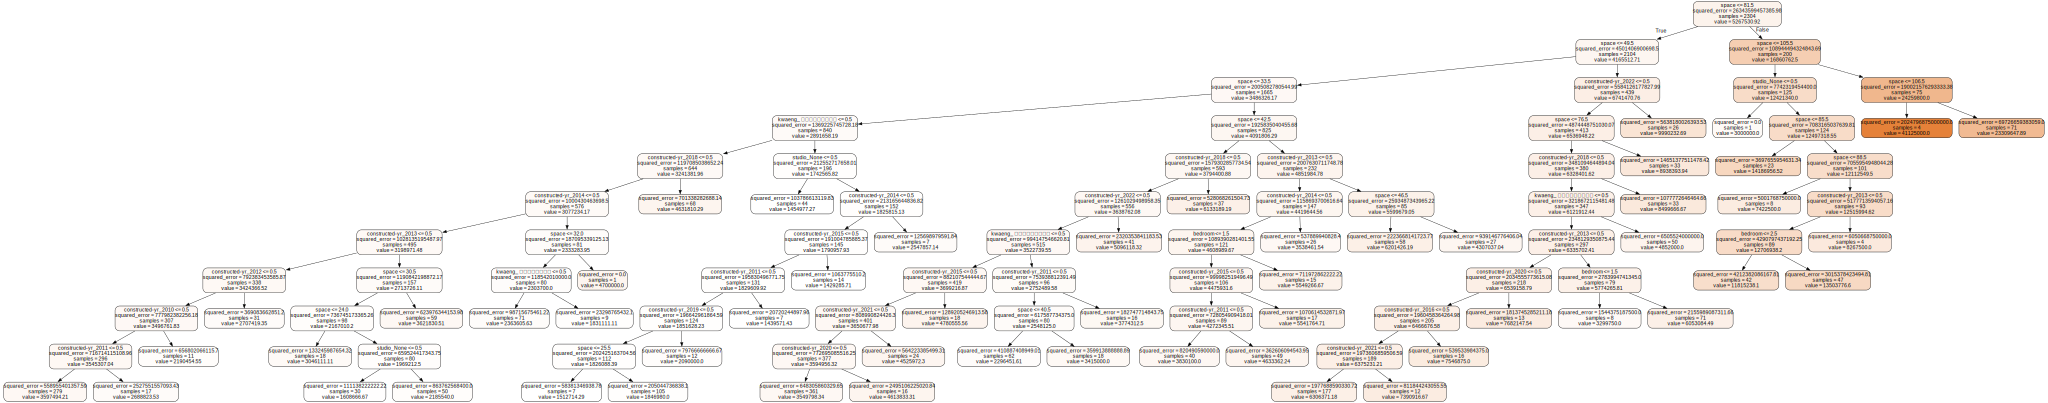

In [184]:
view_tree(model, X_train, save_tree_img=False)

# Random forest
---

In [185]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source
from random import seed, randint

from sklearn.ensemble import RandomForestRegressor

In [186]:
cols = ['name', 'address', 'kwaeng', 'district', 'province', 'price',
       'studio','constructed-yr','range-from-bts','post-by']
X = df4.drop(cols, axis=1)
y = df4['price']

model_for = RandomForestRegressor(n_estimators = 100,
                                  max_depth= 10,
                                  min_samples_split= 15,
                                  min_samples_leaf= 10)
seed(12)
score = []
score2 = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randint(0, 100))
    model_for.fit(X_train, y_train)
    a = model_for.score(X_train, y_train)
    b = model_for.score(X_test, y_test)
    score.append(a)
    score2.append(b)

print(f"Mean training score: {np.mean(score):.4f}")
print(f"Mean testing score: {np.mean(score2):.4f}")

Mean training score: 0.7505
Mean testing score: 0.7911


In [187]:
y_pred2 = model.predict(X_test).round(2)
y_pred2

array([ 3549798.34, 23309647.89,  3046111.11,  3597494.21,  3549798.34,
        3830100.  ,  3597494.21,  3597494.21,  4633362.24,  2296451.61,
        7682147.54,  3549798.34, 23309647.89,  3549798.34,  6306371.18,
        6306371.18,  4307037.04,  3549798.34,  3549798.34,  4780555.56,
        5549266.67,  4852000.  ,  6201426.19,  4307037.04,  6053084.49,
        3549798.34,  3549798.34,  3597494.21,  3549798.34, 23309647.89,
        3597494.21,  3597494.21,  6306371.18, 23309647.89,  6133189.19,
        6306371.18,  5541764.71,  3549798.34,  4613833.31,  1608666.67,
        4525972.3 ,  3621830.51,  6306371.18,  6306371.18,  3549798.34,
        3549798.34,  2363605.63,  3549798.34,  3597494.21,  3538461.54,
        6306371.18,  3597494.21,  2363605.63,  1454977.27,  2090000.  ,
        3549798.34,  6201426.19,  3597494.21,  6306371.18,  1439571.43,
        3621830.51,  2296451.61,  1608666.67,  8938393.94,  3549798.34,
        3597494.21,  3597494.21,  3597494.21,  3597494.21,  3597

In [188]:
dc3 = pd.concat([pd.Series(y_test, name='actual_price').reset_index(drop=True), pd.Series(y_pred2, name='predicted')], axis=1) 
dc3['per_chg'] = ((dc3['actual_price'] - dc3['predicted']).abs() * 100/dc3['actual_price']).round(2)
dc3

,actual_price,predicted,per_chg
0,4270000.0,3549798.34,16.87
1,32000000.0,23309647.89,27.16
2,2900000.0,3046111.11,5.04
3,4100000.0,3597494.21,12.26
4,3900000.0,3549798.34,8.98
...,...,...,...
571,3470000.0,3621830.51,4.38
572,1650000.0,2185540.00,32.46
573,3200000.0,2707419.35,15.39
574,15000000.0,13503776.60,9.97


In [189]:
randomforest = dc3[dc3['per_chg']<=5].count()
randomforest

actual_price    117
predicted       117
per_chg         117
dtype: int64

# KNeighborsClassifier
--- 

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [191]:
df4.columns

Index(['name', 'address', 'kwaeng', 'district', 'province', 'price', 'space',
       'bedroom', 'bathroom', 'studio', 'constructed-yr', 'range-from-bts',
       'post-by', 'kwaeng_ บางกะปิ', 'kwaeng_ สามเสนนอก', 'kwaeng_ ห้วยขวาง',
       'studio_สตูดิโอ', 'studio_None', 'constructed-yr_1995',
       'constructed-yr_1998', 'constructed-yr_2006', 'constructed-yr_2007',
       'constructed-yr_2008', 'constructed-yr_2009', 'constructed-yr_2010',
       'constructed-yr_2011', 'constructed-yr_2012', 'constructed-yr_2013',
       'constructed-yr_2014', 'constructed-yr_2015', 'constructed-yr_2016',
       'constructed-yr_2017', 'constructed-yr_2018', 'constructed-yr_2019',
       'constructed-yr_2020', 'constructed-yr_2021', 'constructed-yr_2022',
       'constructed-yr_2023', 'constructed-yr_2025'],
      dtype='object')

In [192]:
cols = ['name', 'address', 'kwaeng', 'district', 'province', 'price',
       'studio','constructed-yr','range-from-bts','post-by']
X = df4.drop(cols, axis=1)
y = df4['price']

In [193]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state= 12
)

model = KNeighborsRegressor(n_neighbors = 5,
    weights = 'distance',
    p = 1 )
model.fit(X_train, y_train)


KNeighborsRegressor(p=1, weights='distance')

In [194]:
print(f"training score: {model.score(X_train, y_train):.4f}")
print(f"testing score: {model.score(X_test, y_test):.4f}")

training score: 0.8635
testing score: 0.8447


In [195]:
y_pred3 = model.predict(X_test).round(2)
y_pred3


array([ 3426000.  ,  6569800.  ,  1780000.  ,  3786000.  ,  6668000.  ,
        3551900.  ,  4800000.  ,  4420000.  ,  1374000.  ,  7170000.  ,
       13000000.  ,  1852000.  ,  3566000.  ,  3566000.  ,  4385000.  ,
        3552000.  ,  3358000.  ,  1778000.  ,  3333333.33,  3786000.  ,
        2790000.  ,  3800000.  ,  2471000.  ,  3435200.  ,  3695000.  ,
        6316000.  ,  7360000.  ,  2840000.  ,  1560857.14,  2946000.  ,
        3220000.  ,  1714000.  ,  3226666.67,  2789600.  ,  3654285.71,
        3800000.  ,  1736000.  ,  3566000.  ,  6162000.  ,  2586666.67,
        7342857.14,  3497000.  ,  3566000.  ,  3687500.  ,  3786080.  ,
        1000000.  ,  4746140.  ,  3122000.  ,  3566000.  ,  2900000.  ,
        2098000.  ,  1590000.  ,  3566000.  ,  3672000.  ,  1560000.  ,
        7332500.  ,  6990000.  , 34976521.74,  3220000.  ,  3575000.  ,
        4298000.  , 12475000.  ,  5808000.  ,  6173999.8 ,  5675000.  ,
        4800000.  ,  1647500.  ,  2248000.  ,  4750000.  ,  3786

In [196]:
dc4 = pd.concat([pd.Series(y_test, name='actual_price').reset_index(drop=True), pd.Series(y_pred3, name='predicted')], axis=1) 
dc4['per_chg'] = ((dc4['actual_price'] - dc4['predicted']).abs() * 100/dc4['actual_price']).round(2)
dc4


,actual_price,predicted,per_chg
0,3900000.0,3426000.0,12.15
1,6300000.0,6569800.0,4.28
2,2190000.0,1780000.0,18.72
3,2750000.0,3786000.0,37.67
4,6500000.0,6668000.0,2.58
...,...,...,...
571,4950000.0,6170000.0,24.65
572,3200000.0,3550000.0,10.94
573,3700000.0,3568000.0,3.57
574,2300000.0,2270000.0,1.30


In [197]:
kneighbors = dc4[dc4['per_chg']<=5].count()
kneighbors

actual_price    193
predicted       193
per_chg         193
dtype: int64

# XGboost
---

In [198]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

cols = ['name', 'address', 'kwaeng', 'district', 'province', 'price',
       'studio','constructed-yr','range-from-bts','post-by']
X = df4.drop(cols, axis=1)
y = df4['price']

# Train Test Split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state= 17
)

In [199]:
model_XG = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1.0, learning_rate = 0.5,
                          max_depth = 2, alpha = 15, n_estimators = 22)
model_XG .fit(X_train,y_train)

XGBRegressor(alpha=15, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=22, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [200]:
print(f"training score: {model_XG.score(X_train, y_train):.4f}")
print(f"testing score: {model_XG.score(X_test, y_test):.4f}")

training score: 0.7725
testing score: 0.7788


In [201]:
y_pred4 = model_XG.predict(X_test).round(2)
y_pred4

array([ 5023509. ,  6964269. ,  3349507.2,  7724573. ,  3581063.2,
        6678501. ,  3484577.2,  2600928.5,  2120115.5,  6495835.5,
        2779185.2,  3484577.2,  2779185.2,  7709342.5,  1856057. ,
       16123722. ,  4927023. ,  4460590.5,  2874225. ,  3581063.2,
        5252634.5, 18994162. ,  6957514. ,  6401630. ,  3581063.2,
        4221631. ,  3484577.2,  3484577.2,  5822590.5,  4848563.5,
        4425658.5,  6757986. ,  2038722.5,  6757986. ,  4152363.2,
        3517079.8,  3484577.2,  3881399.8,  4050527.2,  3049171. ,
        2682699.2,  1697505.6, 12215043. ,  3349507.2,  7058322.5,
        5023509. ,  5150748.5,  3049171. ,  4927023. , 33967224. ,
        3810188.8, 22148666. ,  4927023. ,  4063615.8,  5023509. ,
        5822590.5,  3581063.2,  2779185.2,  4848563.5,  3484577.2,
        3484577.2,  4927023. ,  6798605. ,  5023509. ,  1952542.9,
        4190324.2,  3484577.2, 32836032. ,  3406117.5,  2865365. ,
        3049171. ,  6495835.5,  2608803.5,  8304778. ,  484856

In [202]:
dc5 = pd.concat([pd.Series(y_test, name='actual_price').reset_index(drop=True), pd.Series(y_pred4, name='predicted')], axis=1) 
dc5['per_chg'] = ((dc5['actual_price'] - dc5['predicted']).abs() * 100/dc5['actual_price']).round(2)
dc5

,actual_price,predicted,per_chg
0,5050000.0,5023509.00,0.52
1,7200000.0,6964269.00,3.27
2,3320000.0,3349507.25,0.89
3,6000000.0,7724573.00,28.74
4,3500000.0,3581063.25,2.32
...,...,...,...
571,29900000.0,23859288.00,20.20
572,3900000.0,2779185.25,28.74
573,3120000.0,4927023.00,57.92
574,3800000.0,4425658.50,16.46


In [203]:
xgboots = dc5[dc5['per_chg']<=5].count()
xgboots

actual_price    106
predicted       106
per_chg         106
dtype: int64

# LightGMB
---

In [204]:
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

OSError: dlopen(/Users/sitanann.s/opt/miniconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/sitanann.s/opt/miniconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [ ]:
def print_category_columns(df2):
    category_cols = df.select_dtypes(include=['category']).columns.tolist()

In [ ]:
cols_to_category = ['kwaeng_ บางกะปิ', 'kwaeng_ สามเสนนอก', 'kwaeng_ ห้วยขวาง','space',
       'bedroom', 'bathroom','studio_สตูดิโอ', 'studio_None', 'constructed-yr_1995',
       'constructed-yr_1998', 'constructed-yr_2006', 'constructed-yr_2007',
       'constructed-yr_2008', 'constructed-yr_2009', 'constructed-yr_2010',
       'constructed-yr_2011', 'constructed-yr_2012', 'constructed-yr_2013',
       'constructed-yr_2014', 'constructed-yr_2015', 'constructed-yr_2016',
       'constructed-yr_2017', 'constructed-yr_2018', 'constructed-yr_2019',
       'constructed-yr_2020', 'constructed-yr_2021', 'constructed-yr_2022',
       'constructed-yr_2023', 'constructed-yr_2025']

df4[cols_to_category] = df4[cols_to_category].astype('category')


In [ ]:
X = df4[cols_to_category]
y = df4['price']

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state= 12
)

model=lgb.LGBMRegressor(num_leaves=25, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

In [ ]:
print(f"training score: {model.score(X_train, y_train):.4f}")
print(f"testing score: {model.score(X_test, y_test):.4f}")

In [ ]:
y_pred5 = model.predict(X_test).round(2)
y_pred5

In [ ]:
dc6 = pd.concat([pd.Series(y_test, name='actual_price').reset_index(drop=True), pd.Series(y_pred5, name='predicted')], axis=1) 
dc6['per_chg'] = ((dc6['actual_price'] - dc6['predicted']).abs() * 100/dc6['actual_price']).round(2)
dc6

In [ ]:
lightgbm = dc6[dc6['per_chg']<=5].count()
lightgbm

# Neural network
---

In [ ]:
cols = ['name', 'address', 'kwaeng', 'district', 'province', 'price',       'studio','constructed-yr','range-from-bts','post-by']
       
X = df4.drop(cols, axis=1)
y = df4['price']

# Train Test Split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state= 17
)
X_train.columns = X_train.columns.astype(str)

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

    # Fit only to the training data
scaler.fit(X_train)
    # Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training the model
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(200, 500, 500), learning_rate_init=0.001, max_iter=1000, early_stopping=True, random_state=101)
mlp.fit(X_train, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(200, 500, 500),
             max_iter=1000, random_state=101)

In [ ]:
print(f"training score: {mlp.score(X_train, y_train):.4f}")
print(f"testing score: {mlp.score(X_test, y_test):.4f}")

training score: 0.6902
testing score: 0.7948


In [ ]:
# Predictions and Evaluation
y_pred6 = mlp.predict(X_test).round(2)
# y_pred6

In [ ]:
dc7 = pd.concat([pd.Series(y_test, name='actual_price').reset_index(drop=True), pd.Series(y_pred6, name='predicted')], axis=1) 
dc7['per_chg'] = ((dc7['actual_price'] - dc7['predicted']) * 100/dc7['actual_price']).abs().round(2)
dc7

,actual_price,predicted,per_chg
0,5050000.0,4267360.13,15.50
1,7200000.0,8386382.85,16.48
2,3320000.0,3641271.77,9.68
3,6000000.0,8509348.94,41.82
4,3500000.0,3566199.41,1.89
...,...,...,...
571,29900000.0,31798042.72,6.35
572,3900000.0,2939467.31,24.63
573,3120000.0,5021111.92,60.93
574,3800000.0,4458942.94,17.34


In [ ]:
neurl = dc7[dc7['per_chg'] <= 5].count()
neurl 

actual_price    114
predicted       114
per_chg         114
dtype: int64

# Catboots
---

In [ ]:
df4.columns

Index(['name', 'address', 'kwaeng', 'district', 'province', 'price', 'space',
       'bedroom', 'bathroom', 'studio', 'constructed-yr', 'range-from-bts',
       'post-by', 'kwaeng_ บางกะปิ', 'kwaeng_ สามเสนนอก', 'kwaeng_ ห้วยขวาง',
       'studio_สตูดิโอ', 'studio_None', 'constructed-yr_1995',
       'constructed-yr_1998', 'constructed-yr_2006', 'constructed-yr_2007',
       'constructed-yr_2008', 'constructed-yr_2009', 'constructed-yr_2010',
       'constructed-yr_2011', 'constructed-yr_2012', 'constructed-yr_2013',
       'constructed-yr_2014', 'constructed-yr_2015', 'constructed-yr_2016',
       'constructed-yr_2017', 'constructed-yr_2018', 'constructed-yr_2019',
       'constructed-yr_2020', 'constructed-yr_2021', 'constructed-yr_2022',
       'constructed-yr_2023', 'constructed-yr_2025'],
      dtype='object')

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

cols = ['name', 'address', 'kwaeng', 'bedroom', 'bathroom','studio_สตูดิโอ', 'studio_None','space', 'constructed-yr', 'post-by']
df4[cols] = df4[cols].astype(str)

X = df4[cols]
y = df4['price']

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

model = CatBoostRegressor(cat_features=cols, depth=10,
                          learning_rate=0.1, iterations=500,
                          l2_leaf_reg=3, random_seed=42)
model.fit(X_train, y_train)

0:	learn: 4771749.0468250	total: 6.72ms	remaining: 3.35s
1:	learn: 4533036.9557927	total: 15.3ms	remaining: 3.8s
2:	learn: 4353446.4738815	total: 16.2ms	remaining: 2.69s
3:	learn: 4171576.7218685	total: 22.4ms	remaining: 2.78s
4:	learn: 4010767.5326474	total: 29.6ms	remaining: 2.93s
5:	learn: 3840138.1222827	total: 32.2ms	remaining: 2.65s
6:	learn: 3705069.5953623	total: 38.2ms	remaining: 2.69s
7:	learn: 3592966.6269155	total: 44.7ms	remaining: 2.75s
8:	learn: 3490196.6182294	total: 46.3ms	remaining: 2.53s
9:	learn: 3396788.4650032	total: 53.7ms	remaining: 2.63s
10:	learn: 3295173.8866589	total: 61.5ms	remaining: 2.73s
11:	learn: 3219931.5641897	total: 73.9ms	remaining: 3.01s
12:	learn: 3153422.3196292	total: 83.3ms	remaining: 3.12s
13:	learn: 3100144.8706364	total: 86ms	remaining: 2.99s
14:	learn: 3046491.3428898	total: 93.3ms	remaining: 3.02s
15:	learn: 2996341.2570006	total: 100ms	remaining: 3.03s
16:	learn: 2945255.0257540	total: 107ms	remaining: 3.03s
17:	learn: 2898521.3082836	to

In [ ]:
print(f"training score: {model.score(X_train, y_train):.4f}")
print(f"testing score: {model.score(X_test, y_test):.4f}")

training score: 0.8363
testing score: 0.8652


In [ ]:
y_pred7 = model.predict(X_test).round(2)
y_pred7

array([ 2249245.64,  1117855.87,  4367413.71, 11692923.53,  7548041.  ,
        3916576.23,  2482259.03,  3890508.72,  2923534.46,  2257972.28,
        3087904.67,  3707722.31,  3214509.88,  6895355.48, 25439925.78,
        3066482.37,  2189845.48,  7186918.57,  3613440.98,  3777689.64,
        6121836.42,  4242520.89,  3364430.43,  4950743.59,  4008907.53,
        6798349.14,  3579634.77,  5832771.07, 10183325.43,  6577747.72,
        3407774.55,  4616150.61,  5575702.  ,  5230541.07,  2815266.26,
        3035828.94,  3768679.68,  6474839.7 ,  5552932.28,  6049214.88,
        5037966.28, 14721295.88,  3779532.85,  3115364.11,  1785095.33,
        1724706.44,  2795716.67,  5602369.55, 11417010.07,  7131130.26,
        3647803.11,  4035836.1 ,  2030111.69, 13175472.14,  5874669.15,
        3909133.64,  3678385.66,  5219399.82,  3810662.2 ,  5576032.47,
        1819447.86,  4861200.81, 15535626.13,  4480904.1 ,  3107481.62,
        7106203.45,  4771333.65,  8170734.45,  3921885.33,  4357

In [ ]:
dc8 = pd.concat([pd.Series(y_test, name='actual_price').reset_index(drop=True), pd.Series(y_pred7, name='predicted')], axis=1) 
dc8['per_chg'] = ((dc8['actual_price'] - dc8['predicted']).abs() * 100/dc8['actual_price']).round(2)
dc8


,actual_price,predicted,per_chg
0,2100000.0,2249245.64,7.11
1,1400000.0,1117855.87,20.15
2,4500000.0,4367413.71,2.95
3,12500000.0,11692923.53,6.46
4,7200000.0,7548041.00,4.83
...,...,...,...
571,4190000.0,4121000.47,1.65
572,6200000.0,5874083.11,5.26
573,12000000.0,11689274.98,2.59
574,6400000.0,6699407.12,4.68


In [ ]:
catboots = dc8[dc8['per_chg']<=5].count()
catboots

actual_price    158
predicted       158
per_chg         158
dtype: int64

# สรุปผล
---

### __กลุ่มเราจะเลือก model Catboost ในการคิดวิเคราะห์เนื่องจากมีเหตุผลดังนี้__ 
- CatBoost มีความแม่นยำและประสิทธิภาพสูงในงาน Machine Learning ต่างๆ รวมถึง Regression
- CatBoost มีเทคนิคการปรับ regularization หลายแบบ เช่น L1, L2 และ Newton Boosting เพื่อช่วยป้องกัน overfitting และปรับปรุงประสิทธิภาพของโมเดลในการ generalization
- CatBoost ถูกออกแบบมาเพื่อให้เร็วและสามารถ scale ได้ตั้งแต่ข้อมูลขนาดใหญ่ที่มีล้านแถวและพันฟีเจอร์ โดยใช้เทคนิคการทำงานแบบ parallelization และ multi-threading ซึ่งใช้ประโยชน์จากสถาปัตยกรรม CPU ที่ทันสมัย

สรุปโดยรวมแล้ว CatBoost เป็นอัลกอริทึมการเรียนรู้ของเครื่องที่มีประสิทธิภาพและความสามารถที่หลากหลาย สามารถจัดการกับประเภทของข้อมูลที่หลากหลายได้ และสามารถให้ความแม่นยำและประสิทธิภาพสูงในงาน regression ต่าง ๆ ได้อย่างดี